# Repaso para 1ra Vuelta

## Motivo

Reapasar los principales temas que se vieron a lo largo del semestre.
Se hará uso de datasets que se encuentra en estándar en Scikit-Learn

## Librerías

In [1]:
import pandas as pd #-> leer y manipular datos. Podemos leer csv, xl y crear dataframes desde 0
import matplotlib.pyplot as plt #-> Graficar
import numpy as np

from sklearn.svm import SVC #-> Maquina vector soporte
from sklearn.manifold import MDS #-> Escalamiento multidimensional
from sklearn.decomposition import PCA #-> Componentes principales
from sklearn.manifold import t_sne #-> tsne
from sklearn.linear_model import LinearRegression #-> regresion lineal
from sklearn.feature_selection import f_oneway #-> para medir qué hiperparámetros nos sirven mas
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering #-> Hacer clusters


%matplotlib inline

/home/david/Documents/MAC/Septimo/Temas Selectos Est Gustavo/envs/tse/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


## Lectura de datos

In [2]:
data = pd.read_excel("Cuestionario Diagnóstico 2019 - 1 (Respuestas).xlsx")
data.drop(columns=("Marca temporal"), axis=1, inplace=True)

In [3]:
data.head()

Carrera  Género  Edad 🎂       Estado civil  \
0  Matemáticas Aplicadas y Computación  Hombre      18          👤 Soltero   
1  Matemáticas Aplicadas y Computación   Mujer      18           💍 Casado   
2  Matemáticas Aplicadas y Computación  Hombre      18          👤 Soltero   
3  Matemáticas Aplicadas y Computación  Hombre      42          👤 Soltero   
4  Matemáticas Aplicadas y Computación  Hombre      18  👥 En una relación   

  ¿Tienes hijos? ¿Tienes alguna dificultad para? [👓 Ver]  \
0             No                                      Si   
1             Sí                                      Si   
2             No                                      No   
3             No                                      No   
4             No                                      Si   

  ¿Tienes alguna dificultad para? [👂 Escuchar]  \
0                                           No   
1                                           No   
2                                           No   
3                                           Si   
4                                           No   

  ¿Tienes alguna dificultad para? [💪 Realizar alguna actividad física]  \
0                                                 No                     
1                                                 No                     
2                                                 No                     
3                                                 No                     
4                                                 No                     

  ¿Dónde vives actualmente? ¿En qué delegación o municipio?  ...  \
0                      CDMX              Gustavo A. Madero   ...   
1          Estado de México                       Naucalpan  ...   
2          Estado de México               Los reyes la paz   ...   
3          Estado de México            Atizapan de zaragoza  ...   
4                      CDMX                    Azcapotzalco  ...   

   ¿Qué tanto sabes sobre...? [Los maestros de la carrera]  \
0                                            Regular         
1                                               Poco         
2                                            Regular         
3                                            Regular         
4                                            Regular         

  ¿Qué tanto sabes sobre...? [El cuerpo directivo de la carrera y la universidad]  \
0                                               Poco                                
1                                            Regular                                
2                                               Poco                                
3                                            Regular                                
4                                            Regular                                

  ¿Qué tanto sabes sobre...? [Actividades deportivas y culturales que ofrece la facultad]  \
0                                            Regular                                        
1                                            Regular                                        
2                                               Poco                                        
3                                               Poco                                        
4                                            Regular                                        

  ¿Qué tanto sabes sobre...? [Recursos de apoyo ]  \
0                                         Regular   
1                                         Regular   
2                                            Nada   
3                                         Regular   
4                                         Regular   

   ¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Deportes ⚽️🏀🏈]  \
0                                                  0                                                    
1                                                  0                            

In [4]:
data = data.fillna(0)

In [5]:
miss = 1-data.describe().T[['count']]/len(data)

In [6]:
miss.describe()

count
count   16.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0

## Análisis descriptivo

In [7]:
data.describe(percentiles=[0.01,0.99]).T

count          mean  \
Edad 🎂                                              228.0   4895.754386   
¿Cuánto tiempo dura (en minutos) el trayecto de...  228.0     82.681140   
¿Cuántas personas en total viven en tu hogar? I...  228.0      4.592105   
¿Cuántos son hombres?                               228.0      2.214912   
¿Cuántas son mujeres?                               228.0      2.385965   
¿Cuánto tiempo llevas viviendo ahí? (años)          228.0     12.583333   
¿Cuántos cuartos para dormir tiene tu vivienda?     228.0      2.885965   
¿Cuántos automóviles en total tienen las person...  228.0      0.951754   
¿Cuántas horas trabajas a la semana?                228.0      2.688596   
¿Qué promedio obtuviste en el bachillerato?         228.0      8.744750   
¿En cuántos años lo terminaste?                     228.0      3.140351   
¿A cuánto aproximadamente ascienden los ingreso...  228.0  12553.592105   
¿Cuántos días a la semana dedicas tiempo para r...  228.0      1.250000   
¿Cuántos días a la semana dedicas tiempo para r...  228.0      0.745614   
¿Cuántos días a la semana dedicas tiempo para r...  228.0      1.289474   
¿Cuántos días a la semana dedicas tiempo para r...  228.0      2.714912   

                                                             std     min  \
Edad 🎂                                              73642.764413    17.0   
¿Cuánto tiempo dura (en minutos) el trayecto de...     46.705786     1.0   
¿Cuántas personas en total viven en tu hogar? I...      1.523770     1.0   
¿Cuántos son hombres?                                   1.228281     0.0   
¿Cuántas son mujeres?                                   1.161108     0.0   
¿Cuánto tiempo llevas viviendo ahí? (años)              6.863495     0.0   
¿Cuántos cuartos para dormir tiene tu vivienda?         1.068234     0.0   
¿Cuántos automóviles en total tienen las person...      1.011975     0.0   
¿Cuántas horas trabajas a la semana?                    7.299415     0.0   
¿Qué promedio obtuviste en el bachillerato?             0.609901     7.0   
¿En cuántos años lo terminaste?                         1.081500     1.0   
¿A cuánto aproximadamente ascienden los ingreso...  19277.245750  1001.0   
¿Cuántos días a la semana dedicas tiempo para r...      1.551963     0.0   
¿Cuántos días a la semana dedicas tiempo para r...      1.312840     0.0   
¿Cuántos días a la semana dedicas tiempo para r...      1.260890     0.0   
¿Cuántos días a la semana dedicas tiempo para r...      2.177649     0.0   

                                                         1%       50%  \
Edad 🎂                                                17.00    18.000   
¿Cuánto tiempo dura (en minutos) el trayecto de...     2.00    90.000   
¿Cuántas personas en total viven en tu hogar? I...     2.00     4.000   
¿Cuántos son hombres?                                  0.00     2.000   
¿Cuántas son mujeres?                                  1.00     2.000   
¿Cuánto tiempo llevas viviendo ahí? (años)             0.00    16.000   
¿Cuántos cuartos para dormir tiene tu vivienda?        1.00     3.000   
¿Cuántos automóviles en total tienen las person...     0.00     1.000   
¿Cuántas horas trabajas a la semana?                   0.00     0.000   
¿Qué promedio obtuviste en el bachillerato?            7.30     8.835   
¿En cuántos años lo terminaste?                        2.27     3.000   
¿A cuánto aproximadamente ascienden los ingreso...  1354.00  8000.000   
¿Cuántos días a la semana dedicas tiempo para r...     0.00     1.000   
¿Cuántos días a la semana dedicas tiempo para r...     0.00     0.000   
¿Cuántos días a la semana dedicas tiempo para r...     0.00     1.000   
¿Cuántos días a la semana dedicas tiempo para r...     0.00     2.000   

                                                            99%        max  
Edad 🎂                                                  32.3000  1112000.0  
¿Cuánto tiempo dura (en minutos) el trayecto de...     187.3000      240.0  
¿Cuántas p

In [8]:
df = data[data["Edad 🎂"]<32]
df = data[data["¿Cuánto tiempo llevas viviendo ahí? (años)"]<22]
df = data[data["¿Cuántos automóviles en total tienen las personas que conforman tu hogar?"]<3]
df = data[data["¿En cuántos años lo terminaste?"]<6]
df = data[data["¿A cuánto aproximadamente ascienden los ingresos de tu hogar(considerando a todos los que aportan)?"]<=100000.0000]
df.shape

(227, 80)

array([[<AxesSubplot:title={'center':'Edad 🎂'}>,
        <AxesSubplot:title={'center':'¿Cuánto tiempo dura (en minutos) el trayecto de tu casa a la facultad? ⏱'}>,
        <AxesSubplot:title={'center':'¿Cuántas personas en total viven en tu hogar? Incluyéndote a ti'}>,
        <AxesSubplot:title={'center':'¿Cuántos son hombres?'}>],
       [<AxesSubplot:title={'center':'¿Cuántas son mujeres?'}>,
        <AxesSubplot:title={'center':'¿Cuánto tiempo llevas viviendo ahí? (años)'}>,
        <AxesSubplot:title={'center':'¿Cuántos cuartos para dormir tiene tu vivienda?'}>,
        <AxesSubplot:title={'center':'¿Cuántos automóviles en total tienen las personas que conforman tu hogar?'}>],
       [<AxesSubplot:title={'center':'¿Cuántas horas trabajas a la semana?'}>,
        <AxesSubplot:title={'center':'¿Qué promedio obtuviste en el bachillerato?'}>,
        <AxesSubplot:title={'center':'¿En cuántos años lo terminaste?'}>,
        <AxesSubplot:title={'center':'¿A cuánto aproximadamente ascien

/home/david/Documents/MAC/Septimo/Temas Selectos Est Gustavo/envs/tse/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/david/Documents/MAC/Septimo/Temas Selectos Est Gustavo/envs/tse/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/david/Documents/MAC/Septimo/Temas Selectos Est Gustavo/envs/tse/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/david/Documents/MAC/Septimo/Temas Selectos Est Gustavo/envs/tse/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/david/Documents/MAC/Septimo/Temas Selectos Est Gustavo/envs/tse/lib/python

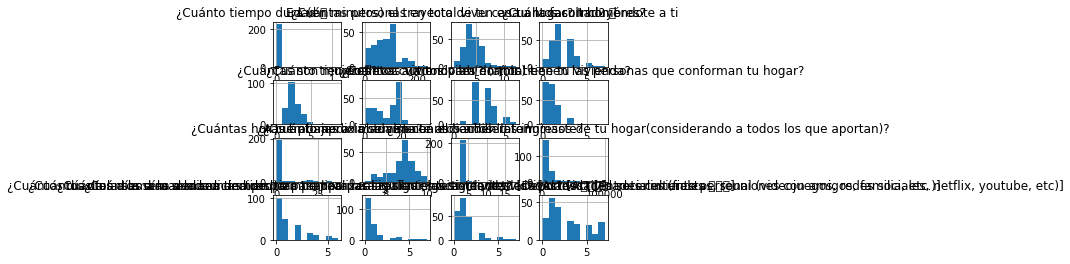

In [9]:
df.hist()

## Reducción de Dimensiones

In [10]:
disc = ["Carrera", "Género", "Estado civil", '¿Tienes hijos?', '¿Tienes alguna dificultad para? [👓 Ver]',
       '¿Tienes alguna dificultad para? [👂 Escuchar]',
       '¿Tienes alguna dificultad para? [💪 Realizar alguna actividad física]',
       '¿Dónde vives actualmente?', '¿En qué delegación o municipio?',
        '¿Qué medio de transporte utilizas para llegar a la facultad?',
        '¿Cuál de las siguientes opciones describe tu tipo de vivienda?',
       '¿Con quién vives? (Puedes seleccionar más de una)',
        '¿Cuál es el máximo nivel de estudios de tu papá?',
       '¿Cuál es el máximo nivel de estudios de tu mamá?',
       '¿Con cuáles de los siguientes servicios básicos cuentas en tu hogar? Puedes seleccionar más de uno',
        '¿Con cuáles de los siguientes servicios de salud cuentas?',
       '¿Con cuáles de los siguientes servicios secundarios cuentas en tu hogar?',
       '¿Con cuáles de estos bienes cuenta tu vivienda? Puedes seleccionar más de uno',
       '¿Cuáles de estos bienes personales posees? Puedes seleccionar más de uno',
       'En caso de que tengas smartphone ¿Qué sistema operativo tiene?',
       '¿Dónde vivirás mientras cursas tus estudios universitarios?',
       '¿De qué forma financiarás tus estudios universitarios?',
       '¿Trabajas actualmente?','¿Tu trabajo tiene relación con la carrera que estas estudiando?',
       'Selecciona, según sea el caso, el tipo de institución en la que cursaste los niveles básicos de estudio [Primaria]',
       'Selecciona, según sea el caso, el tipo de institución en la que cursaste los niveles básicos de estudio [Secundaria]',
       '¿En dónde cursaste el bachillerato?',
       '¿Cómo se llama la institución donde cursaste el bachillerato?',
        '¿Recibiste alguna beca?',
       'Simultaneo a tus estudios de bachillerato ¿tuviste que trabajar?',
       'Señala tu nivel de conocimiento de idiomas [Inglés]',
       'Señala tu nivel de conocimiento de idiomas [Otro idioma]',
       'Señala tu nivel de conocimiento de idiomas [Lengua indígena]',
       '¿Tienes algún certificado que corrobore tu nivel de inglés?',
       '¿Tienes estudios incompletos de una carrera profesional o técnica superior?',
       '¿Qué nivel de conocimientos posees de...? [Procesadores de texto (Word, TeX, etc.)]',
       '¿Qué nivel de conocimientos posees de...? [Hojas de cálculo (Excel, Calc, etc.)]',
       '¿Qué nivel de conocimientos posees de...? [Programación]',
       '¿Qué nivel de conocimientos posees de...? [Gestor de base de datos (SQL)]',
        '¿Cuál fue el proceso de admisión por el que entraste a esta carrera?',
       'Escoger ésta carrera fue...', 'Al escoger la FES Acatlán ésta fue:',
       '¿Cuándo tomaste la decisión de lo que querías estudiar?',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Recomendación de conocidos]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Mucha oferta laboral para esta carrera]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Promoción y prestigio social]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Es una carrera fácil]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Es una carrera corta]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [No me admitieron en otra carrera]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Me obligaron mis papás]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Me la recomendaron conocidos y amigos]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Autorealización]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Va de acuerdo a mis aptitudes e intereses]',
       '¿Cuánta importancia le diste a cada uno de estos factores en tu decisión de estudiar esta carrera? [Por el estatus económico que adquiriré al titularme]',
       '¿Qué tanto sabes sobre...? [El perfil de estudios de la carrera]',
       '¿Qué tanto sabes sobre...? [El plan de estudios]',
       '¿Qué tanto sabes sobre...? [El nivel de exigencia]',
       '¿Qué tanto sabes sobre...? [La empleabilidad de los egresados]',
       '¿Qué tanto sabes sobre...? [Los maestros de la carrera]',
       '¿Qué tanto sabes sobre...? [El cuerpo directivo de la carrera y la universidad]',
       '¿Qué tanto sabes sobre...? [Actividades deportivas y culturales que ofrece la facultad]',
       '¿Qué tanto sabes sobre...? [Recursos de apoyo ]',
        'Al terminar la carrera ¿qué esperas hacer además de titularte?',
       'Número de cuenta']
vard = [v for v in df if v in disc]
varc = [v for v in df if v not in disc]
varc

['Edad 🎂',
 '¿Cuánto tiempo dura (en minutos) el trayecto de tu casa a la facultad? ⏱',
 '¿Cuántas personas en total viven en tu hogar? Incluyéndote a ti',
 '¿Cuántos son hombres?',
 '¿Cuántas son mujeres?',
 '¿Cuánto tiempo llevas viviendo ahí? (años)',
 '¿Cuántos cuartos para dormir tiene tu vivienda?',
 '¿Cuántos automóviles en total tienen las personas que conforman tu hogar?',
 '¿Cuántas horas trabajas a la semana?',
 '¿Qué promedio obtuviste en el bachillerato?',
 '¿En cuántos años lo terminaste?',
 '¿A cuánto aproximadamente ascienden los ingresos de tu hogar(considerando a todos los que aportan)?',
 '¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Deportes ⚽️🏀🏈]',
 '¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Actividades culturales 🎭🎬🎻]',
 '¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Actividades sociales (fiestas, reuniones con amigos, familia, etc.)]',
 '¿Cuántos

In [11]:
x = df[varc].copy()
x.head()

Edad 🎂  \
0      18   
1      18   
2      18   
3      42   
4      18   

   ¿Cuánto tiempo dura (en minutos) el trayecto de tu casa a la facultad? ⏱  \
0                                              120.0                          
1                                               60.0                          
2                                              130.0                          
3                                                2.0                          
4                                               40.0                          

   ¿Cuántas personas en total viven en tu hogar? Incluyéndote a ti  \
0                                                  6                 
1                                                  6                 
2                                                  3                 
3                                                  8                 
4                                                  4                 

   ¿Cuántos son hombres?  ¿Cuántas son mujeres?  \
0                      4                      2   
1                      3                      3   
2                      1                      2   
3                      4                      3   
4                      2                      2   

   ¿Cuánto tiempo llevas viviendo ahí? (años)  \
0                                           5   
1                                           0   
2                                           5   
3                                           3   
4                                          18   

   ¿Cuántos cuartos para dormir tiene tu vivienda?  \
0                                                1   
1                                                3   
2                                                2   
3                                                4   
4                                                5   

   ¿Cuántos automóviles en total tienen las personas que conforman tu hogar?  \
0                                                  0                           
1                                                  2                           
2                                                  0                           
3                                                  1                           
4                                                  1                           

   ¿Cuántas horas trabajas a la semana?  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   8.0   
4                                   0.0   

   ¿Qué promedio obtuviste en el bachillerato?  \
0                                         7.43   
1                                         7.80   
2                                         8.34   
3                                         7.45   
4                                         8.50   

   ¿En cuántos años lo terminaste?  \
0                                3   
1                                3   
2                                3   
3                                6   
4                                3   

   ¿A cuánto aproximadamente ascienden los ingresos de tu hogar(considerando a todos los que aportan)?  \
0                                               4000                                                     
1                                               5000                                                     
2                                               8000                                                     
3                                              13000                                                     
4                                              35000                                                     

   ¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Deportes ⚽️🏀🏈]  \
0                                                  0                                     

## Modelo Supervisado

## Modelo no supervisado